In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [113]:
customers  = pd.read_csv('swiggy-Customers.csv')
orders = pd.read_csv('swiggy-Orders.csv')
order_detials = pd.read_csv('swiggy-OrderDetails.csv')

In [114]:
customers.head(5)

,CustomerID,Name,Phone,Address,City
0,1,Kavya Reddy,9193214172,"Koramangala, Delhi",Mumbai
1,2,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
2,3,Neha Joshi,6430427670,"Civil Lines, Hyderabad",Jaipur
3,4,Siddharth Mehta,2645852001,"MG Road, Jaipur",Jaipur
4,5,Rajesh Reddy,2428071930,"Koramangala, Pune",Ahmedabad


In [115]:
orders.head(5)

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered


In [116]:
order_detials.head(5)

,OrderDetailsID,OrderID,ProductName,Quantity,PricePerUnit
0,1,2262,Clinic Plus Shampoo,1,99
1,2,115,Maggi Noodles,5,120
2,3,3872,Harpic Toilet Cleaner,4,300
3,4,3489,Ariel Detergent,5,99
4,5,1717,Bournvita,3,99


### Data Cleaning

City col in customers contain wrong city so first make them correct

In [117]:
customers.drop(columns="City",axis=1)
customers["City"] = customers['Address'].str.split(",").str[-1].str.strip()

change the datatype of OrderDateTime & DeliveryDateTime columns to datetime format

In [118]:
orders['OrderDateTime'] = pd.to_datetime(orders['OrderDateTime'])
orders["DeliveryDateTime"] = pd.to_datetime(orders['DeliveryDateTime'])
orders.dtypes

OrderID                      int64
CustomerID                   int64
OrderDateTime       datetime64[ns]
DeliveryDateTime    datetime64[ns]
TotalAmount                  int64
DeliveryStatus              object
dtype: object

Merge datasets

In [119]:
swiggy_data  = orders.merge(customers,how="left",on="CustomerID")
swiggy_data = swiggy_data.merge(order_detials,how="left",on="OrderID")
swiggy_data.head(5)

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus,Name,Phone,Address,City,OrderDetailsID,ProductName,Quantity,PricePerUnit
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi,834.0,Himalaya Face Wash,5.0,35.0
1,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi,8257.0,Clinic Plus Shampoo,3.0,80.0
2,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered,Pooja Joshi,7598229457,"Civil Lines, Delhi",Delhi,3082.0,Ariel Detergent,5.0,45.0
3,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered,Pooja Joshi,7598229457,"Civil Lines, Delhi",Delhi,6455.0,Aashirvaad Atta,4.0,200.0
4,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered,Pooja Joshi,7598229457,"Civil Lines, Delhi",Delhi,8677.0,Ariel Detergent,5.0,180.0


Missing Value Handling

In [120]:
swiggy_data.isna().mean()*100

OrderID             0.000000
CustomerID          0.000000
OrderDateTime       0.000000
DeliveryDateTime    2.022059
TotalAmount         0.000000
DeliveryStatus      0.000000
Name                0.000000
Phone               0.000000
Address             0.000000
City                0.000000
OrderDetailsID      3.250774
ProductName         3.250774
Quantity            3.250774
PricePerUnit        3.250774
dtype: float64

In [121]:
# missing values from numeric cols
num_col  = ["Quantity","PricePerUnit"]
for col in num_col:
    if swiggy_data[col].std()/swiggy_data[col].mean() <1:
        swiggy_data[col].fillna(swiggy_data[col].mean(),inplace=True)
    else:
        swiggy_data[col].fillna(swiggy_data[col].median(),inplace=True)

# missing values from categorical cols
cat_col = ['DeliveryDateTime','OrderDetailsID','ProductName']
for col in cat_col:
    swiggy_data[col].fillna(swiggy_data[col].mode()[0],inplace=True)

/tmp/ipykernel_5517/2468059018.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  swiggy_data[col].fillna(swiggy_data[col].mean(),inplace=True)
/tmp/ipykernel_5517/2468059018.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Outlier Treatment

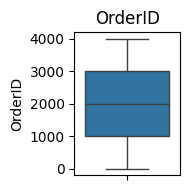

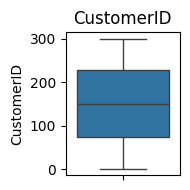

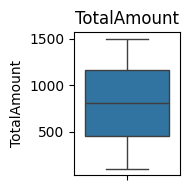

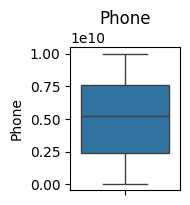

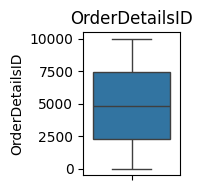

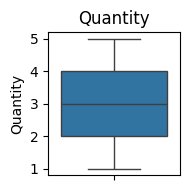

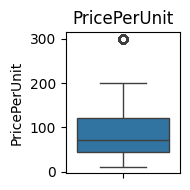

In [122]:
num_col = swiggy_data.select_dtypes(include=['number']).columns

for col in num_col:
    plt.figure(figsize=(2,2))
    sns.boxplot(swiggy_data[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()
    


In [123]:
swiggy_data['PricePerUnit'].describe()

count    10336.000000
mean        89.953500
std         69.807456
min         10.000000
25%         45.000000
50%         70.000000
75%        120.000000
max        300.000000
Name: PricePerUnit, dtype: float64

In [124]:
q1 = swiggy_data['PricePerUnit'].quantile(.25)
q3 = swiggy_data['PricePerUnit'].quantile(.75)
IQR = q3-q1
lb  = q1- 1.5*IQR
ub  = q3 + 1.5*IQR
lb,ub

(np.float64(-67.5), np.float64(232.5))

Outlier removal

In [125]:
swiggy_data['PricePerUnit'] = np.where(swiggy_data['PricePerUnit']>ub,ub,swiggy_data['PricePerUnit'])

### Feature engineering

In [126]:
swiggy_data['OrderDate'] = swiggy_data['OrderDateTime'].dt.date
swiggy_data['OrderHour']  = swiggy_data['OrderDateTime'].dt.hour
swiggy_data['OrderDay'] = swiggy_data['OrderDateTime'].dt.day_name()

### EDA & Visualizations

Top Cities by Order Volume

/tmp/ipykernel_5517/700917497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index,y=top_cities.values,palette="viridis")


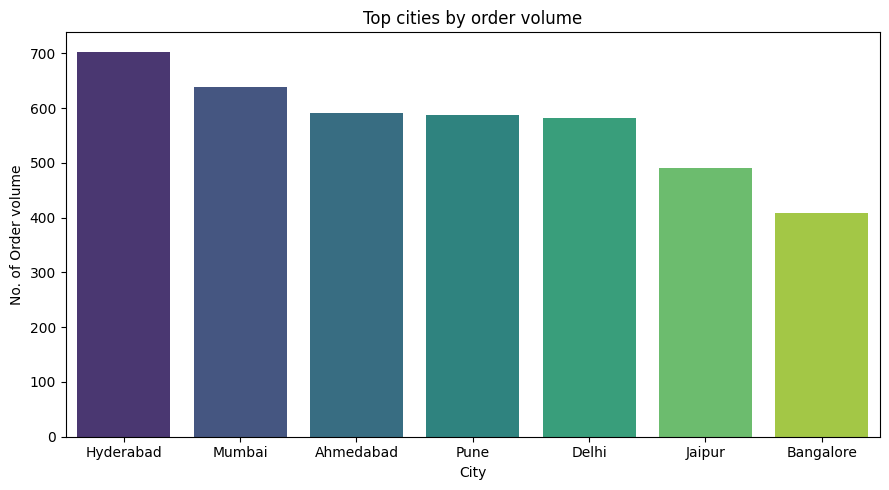

In [127]:
top_cities  =swiggy_data.groupby("City")["OrderID"].nunique().sort_values(ascending=False)
plt.figure(figsize=(9,5))
sns.barplot(x=top_cities.index,y=top_cities.values,palette="viridis")
plt.xlabel("City")
plt.ylabel('No. of Order volume')
plt.title("Top cities by order volume")
plt.tight_layout()
plt.show()

Peak Order Hours

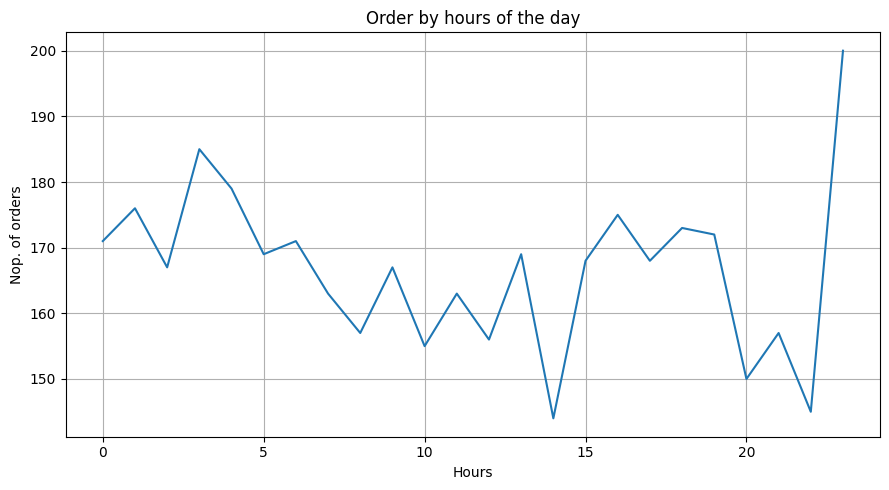

In [128]:
peak_hours = swiggy_data.groupby("OrderHour")['OrderID'].nunique()
plt.figure(figsize=(9,5))
sns.lineplot(x=peak_hours.index,y=peak_hours.values,markers="o")
plt.title("Order by hours of the day")
plt.xlabel("Hours")
plt.ylabel("Nop. of orders")
plt.grid(True)
plt.tight_layout()
plt.show()

Best-Selling Products

/tmp/ipykernel_5517/2275860163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_prod.values, y=top_selling_prod.index, palette="mako")


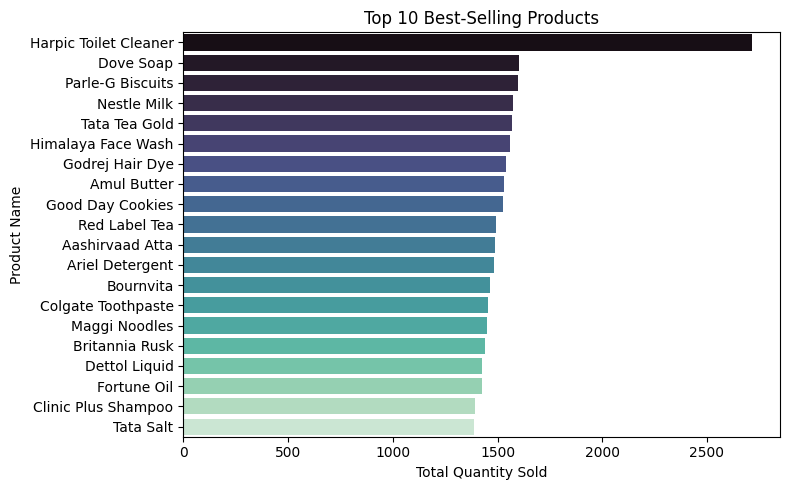

In [129]:
top_selling_prod = swiggy_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=top_selling_prod.values, y=top_selling_prod.index, palette="mako")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

Revenue by City

/tmp/ipykernel_5517/3263704300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue.index, y=city_revenue.values, palette="plasma")


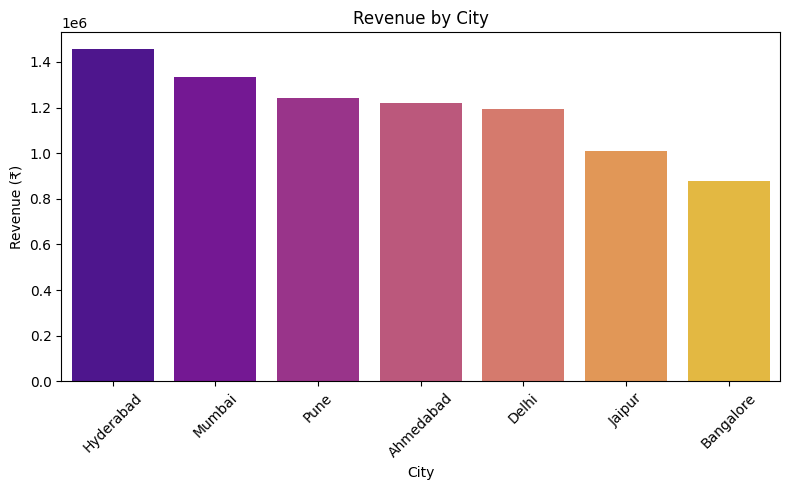

In [130]:
city_revenue = swiggy_data.groupby('City')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=city_revenue.index, y=city_revenue.values, palette="plasma")
plt.xticks(rotation=45)
plt.title("Revenue by City")
plt.ylabel("Revenue (₹)")
plt.xlabel("City")
plt.tight_layout()
plt.show()

No. of orders by delivery status

/tmp/ipykernel_5517/1303798093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_count.index, y="OrderID",data=status_count, palette="mako")


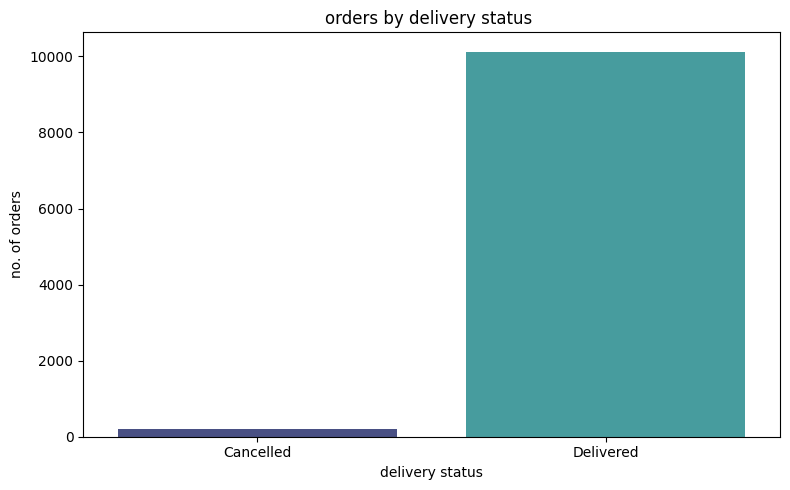

In [131]:
status_count = swiggy_data.groupby('DeliveryStatus').agg({"OrderID":"count"})
plt.figure(figsize=(8,5))
sns.barplot(x=status_count.index, y="OrderID",data=status_count, palette="mako")
plt.title("orders by delivery status ")
plt.xlabel("delivery status")
plt.ylabel("no. of orders")
plt.tight_layout()
plt.show()


revenue by delivery status

/tmp/ipykernel_5517/608639874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_count.index, y="TotalAmount",data=revune_by_del_status, palette="mako")


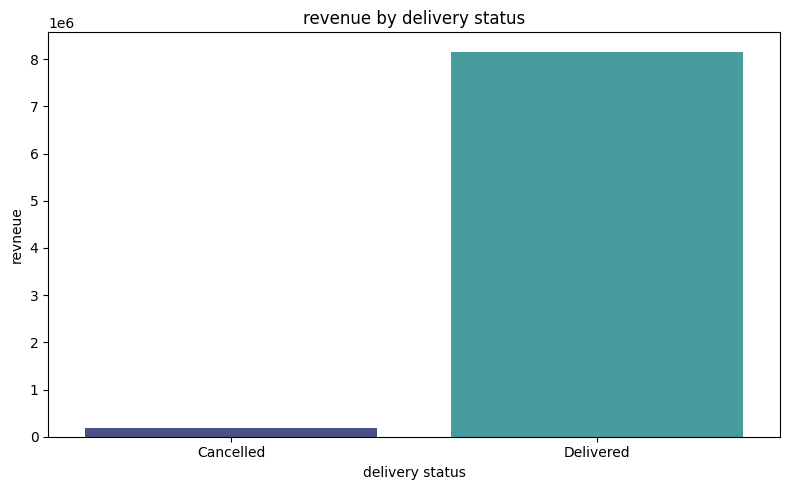

In [132]:
revune_by_del_status= swiggy_data.groupby('DeliveryStatus').agg({"TotalAmount":"sum"})
plt.figure(figsize=(8,5))
sns.barplot(x=status_count.index, y="TotalAmount",data=revune_by_del_status, palette="mako")
plt.title("revenue by delivery status")
plt.xlabel("delivery status")
plt.ylabel("revneue")
plt.tight_layout()
plt.show()

### Key insights

In [133]:
insights = {
    "Top_City": top_cities.index[0],
    "Top_City_Orders": int(top_cities.iloc[0]),
    "Peak_Hour": int(peak_hours.idxmax()),
    "Peak_Hour_Orders": int(peak_hours.max()),
    "Best_Selling_Product": top_selling_prod.index[0],
    "Best_Selling_Product_Quantity": int(top_selling_prod.iloc[0]),
    "Top_Revenue_City": city_revenue.index[0],
    "Top_Revenue_Amount": int(city_revenue.iloc[0])
}

print("Key Insights")
for k, v in insights.items():
    print(f"{k}: {v}")

Key Insights
Top_City: Hyderabad
Top_City_Orders: 703
Peak_Hour: 23
Peak_Hour_Orders: 200
Best_Selling_Product: Harpic Toilet Cleaner
Best_Selling_Product_Quantity: 2712
Top_Revenue_City: Hyderabad
Top_Revenue_Amount: 1457035
